## Accessing USDA Food Data Central API for Nutritional Information

This script interacts with the USDA Food Data Central API to search for food items and retrieve nutritional information.

In [4]:
#!pip install requests
import requests

# Define your API key (it should be the actual key, not "OAS3.0:")
api_key = 'M3175TAXsEcfdKkCOpNO9VcbwjQtFOkl9rUDAiaP'

# Function to search for a food item and get its FDC ID
def search_food(query):
    #This is the data set for the USDA government
    url = "https://api.nal.usda.gov/fdc/v1/foods/search"
    # my parameters are query for the 
    params = {
        "query": query, # search term enterd by user 
        "api_key": api_key, 
        "pageSize": 1  # Return only the top result
    }
    # using request.get() to send a get request to the API endpoint
    response = requests.get(url, params=params)
    #lines checks for the Https status and if it 200 then its okay
    if response.status_code == 200:
        # returns the json format to dictionary
        data = response.json()
        #checks for food items 
        if data['foods']:
            # this will get the first result 
            food_item = data['foods'][0]
            # return the food id and its description
            return food_item['fdcId'], food_item['description']
        else:
           #No foods were found
            print("No foods found.")
            return None, None
    else:
      # it will print out the error responce code
        print(f"Error: {response.status_code}")
        return None, None

# Function to retrieve detailed nutritional information using FDC ID
def get_food_details(fdc_id):

    url = f"https://api.nal.usda.gov/fdc/v1/food/{fdc_id}"
    params = {
        "api_key": api_key,
        "format": "full"#All available details for food
    }
    # Returns the full detail information for the food 
    response = requests.get(url, params=params)
    # Same thing as earlier 
    if response.status_code == 200:
        food_details = response.json()
        return food_details
    else:
        print(f"Error: {response.status_code}")
        return None

# whatever the user wants

foodname = str(input("Please enter the name of the object you want the nutrition data for: "))

# Example usage
if __name__ == "__main__":
    food_query = foodname
    fdc_id, description = search_food(food_query)
    
    if fdc_id:
        print(f"FDC ID: {fdc_id}, Description: {description}")
        food_details = get_food_details(fdc_id)
        
        # Print out some of the nutritional information
        if food_details:
            print(f"\nNutritional Information for {description}:")
            for nutrient in food_details.get('foodNutrients', []):
                print(f"{nutrient['nutrient']['name']}: {nutrient['amount']} {nutrient['nutrient']['unitName']}")
    else:
        print("Could not retrieve food details.")

FDC ID: 770088, Description: OREO COOKIES

Nutritional Information for OREO COOKIES:
Carbohydrate, by difference: 73.0 g
Total lipid (fat): 20.0 g
Fiber, total dietary: 2.5 g
Sodium, Na: 400.0 mg
Total Sugars: 38.0 g
Protein: 5.0 g
Fatty acids, total saturated: 9.8 g


## Extract Video Frames in Smaller Batches

1. Process multiple videos from the input folder.
2. Create a new numbered subfolder within the output folder for each video.
3. Name each subfolder with a sequential number followed by _vid.
4. Store the extracted frames as JPG files within their respective subfolders.

In [2]:
import cv2
import os

def video_to_frames_in_smaller_batches(video_folder, output_folder, desired_fps):
    print(f"Processing videos in {video_folder} to {output_folder} with {desired_fps} FPS")
    # List all video files in the selected folder
    video_files = [f for f in os.listdir(video_folder) if os.path.isfile(os.path.join(video_folder, f)) and f.endswith(('.mp4', '.avi', '.mov', '.mkv'))]

    if not video_files:
        print("No video files found in the selected folder.")
        return

    for idx, video_file in enumerate(video_files, start=1):
        video_path = os.path.join(video_folder, video_file)

        # Create a new subfolder in the output folder named <number>_vid
        video_output_folder = os.path.join(output_folder, f'{idx}_vid')
        os.makedirs(video_output_folder, exist_ok=True)

        # Open the video file
        cap = cv2.VideoCapture(video_path)
        original_fps = cap.get(cv2.CAP_PROP_FPS)

        if original_fps <= 0:
            print(f"Warning: Unable to retrieve FPS for video {video_file}. Skipping...")
            continue

        # Calculate the frame interval to match the desired FPS
        frame_interval = int(round(original_fps / desired_fps))

        if frame_interval <= 0:
            frame_interval = 1  # Ensure at least every frame is processed

        frame_count = 0
        saved_frame_count = 0

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Save frames at the specified interval into the specific subfolder
            if frame_count % frame_interval == 0:
                frame_filename = os.path.join(video_output_folder, f'frame_{saved_frame_count:05d}.jpg')
                cv2.imwrite(frame_filename, frame)
                saved_frame_count += 1

            frame_count += 1

        cap.release()
        print(f"Extracted frames from '{video_file}' into the folder '{video_output_folder}'.")

    print("Processing complete.")

## Video file selection

This code cell creates a graphical user interface (GUI) using Python's `tkinter` library to assist users in processing video files. The GUI guides the user through the following steps:

1. **Greeting the User**: Asks if they would like to process videos.
2. **Selecting a Video Folder**: Opens a dialog for the user to choose a folder containing video files.
3. **Handling Missing Files**: Provides help if the user cannot find the desired video folder.
4. **Prompting for Frames Per Second (FPS)**: Asks the user to input the desired frames per second (FPS) for the video processing.
5. **Selecting an Output Folder**: Prompts the user to choose or create a folder where the processed frames will be saved.
6. **Handling Default Output Folder**: If the user does not select an output folder, the program creates a default folder named `output_file` in the current working directory.
7. **Handling Duplicate Output Folders**: If a folder named `output_file` already exists, the program notifies the user and terminates to avoid conflicts.
8. **Processing the Videos**: Processes the videos by extracting frames at the specified FPS and saves them in the output folder.



In [3]:
import tkinter as tk
from tkinter import filedialog, messagebox, simpledialog


# Function to handle when the user can't find their file (to be implemented)
def handle_cant_find_file():
    # Placeholder for the file search assistance logic
    messagebox.showinfo("Help", "Please check your folder structure and try again.")



def greet_and_prompt():
    root = tk.Tk()
    root.withdraw()  # Hide the root window

    # Greet the user
    user_response = messagebox.askquestion("Welcome", "Hello! Would you like to process videos?")

    if user_response == 'yes':
        while True:
            # Ask the user to select the folder containing video files
            video_folder = filedialog.askdirectory(title="Select the Folder Containing Videos")

            if video_folder:
                break  # Break the loop if a folder is selected
            else:
                # Option for the user if they can't find the folder
                cant_find_response = messagebox.askquestion("Can't Find Folder",
                                                            "Can't find your folder? Would you like some help?",
                                                            icon='warning')
                if cant_find_response == 'yes':
                    handle_cant_find_file()
                else:
                    messagebox.showinfo("Goodbye", "You chose not to proceed. Goodbye!")
                    root.update()  # Process any pending events
                    root.quit()  # Exit the main loop
                    root.destroy()  # Destroy the Tkinter root window
                    return  # Exit the function and stop the script

        # Prompt the user to select the output folder
        select_output_response = messagebox.askquestion("Output Folder", "Would you like to select an output folder now?")
        
        if select_output_response == 'yes':
            while True:
                output_folder = filedialog.askdirectory(title="Select Output Folder")

                if output_folder:
                    messagebox.showinfo("Folder Selected", f"Output folder selected: {output_folder}")
                    break  # Proceed if a valid output folder is selected
                else:
                    # Notify the user to select a folder or quit the process
                    retry_response = messagebox.askquestion("No Folder Selected",
                                                            "You haven't selected an output folder. Would you like to try again?",
                                                            icon='warning')
                    if retry_response == 'no':
                        messagebox.showinfo("Goodbye", "You chose not to proceed. Goodbye!")
                        root.update()  # Process any pending events
                        root.quit()  # Exit the main loop
                        root.destroy()  # Destroy the Tkinter root window
                        return  # Exit the function and stop the script
        else:
            messagebox.showinfo("Goodbye", "You chose not to select an output folder. Goodbye!")
            root.update()  # Process any pending events
            root.quit()  # Exit the main loop
            root.destroy()  # Destroy the Tkinter root window
            return  # Exit the function and stop the script

        # Ask the user to input the frames per second (FPS)
        fps = simpledialog.askinteger("Frames Per Second", "Please enter the frames per second (FPS) value:", minvalue=1)

        if fps:
            # Call the function with the gathered information
            video_to_frames_in_smaller_batches(video_folder, output_folder, int(fps))
            messagebox.showinfo("Process Complete", f"Videos processed with {fps} frames per second.")
        else:
            messagebox.showinfo("No FPS Entered", "You didn't enter a valid FPS value. Goodbye!")
    
    else:
        messagebox.showinfo("Goodbye", "You chose not to proceed. Goodbye!")
    
    root.update()  # Process any pending events
    root.quit()  # Exit the main loop
    root.destroy()  # Destroy the Tkinter root window


# Call the function
if __name__ == "__main__":
    greet_and_prompt()


Processing videos in /Users/jeanmarckceant/Desktop/Video_folder to /Users/jeanmarckceant/Desktop/Output_folder with 8 FPS
Extracted frames from '2235947-hd_1920_1080_24fps.mp4' into the folder '/Users/jeanmarckceant/Desktop/Output_folder/1_vid'.
Extracted frames from '3214097-uhd_3840_2160_25fps.mp4' into the folder '/Users/jeanmarckceant/Desktop/Output_folder/2_vid'.
Processing complete.


## Video segmentation with SAM 2
This notebook shows how to use SAM 2 for interactive segmentation in videos. It will cover the following:

- adding clicks (or box) on a frame to get and refine _masklets_ (spatio-temporal masks)
- propagating clicks (or box) to get _masklets_ throughout the video
- segmenting and tracking multiple objects at the same time

We use the terms _segment_ or _mask_ to refer to the model prediction for an object on a single frame, and _masklet_ to refer to the spatio-temporal masks across the entire video. 

## Annotating Images with Bounding Boxes for Object Detection

This script helps annotate objects in images by drawing bounding boxes and saving them as training labels for models.
If running locally using jupyter, first install `segment-anything-2` in your environment using the [installation instructions](https://github.com/facebookresearch/segment-anything-2#installation) in the repository.


## Set env for SAM2 

In [1]:
using_colab = False
if using_colab:
    import torch
    import torchvision
    print("PyTorch version:", torch.__version__)
    print("Torchvision version:", torchvision.__version__)
    print("CUDA is available:", torch.cuda.is_available())
    import sys
    !{sys.executable} -m pip install opencv-python matplotlib
    !{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything-2.git'

    !mkdir -p videos
    !wget -P videos https://dl.fbaipublicfiles.com/segment_anything_2/assets/bedroom.zip
    !unzip -d videos videos/bedroom.zip

    !mkdir -p ../checkpoints/
    !wget -P ../checkpoints/ https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_large.pt

    

In [2]:
import os
# if using Apple MPS, fall back to CPU for unsupported ops
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
# select the device for computation
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")
print(f"using device: {device}")

if device.type == "cuda":
    # use bfloat16 for the entire notebook
    torch.autocast("cuda", dtype=torch.bfloat16).__enter__()
    # turn on tfloat32 for Ampere GPUs (https://pytorch.org/docs/stable/notes/cuda.html#tensorfloat-32-tf32-on-ampere-devices)
    if torch.cuda.get_device_properties(0).major >= 8:
        torch.backends.cuda.matmul.allow_tf32 = True
        torch.backends.cudnn.allow_tf32 = True
elif device.type == "mps":
    print(
        "\nSupport for MPS devices is preliminary. SAM 2 is trained with CUDA and might "
        "give numerically different outputs and sometimes degraded performance on MPS. "
        "See e.g. https://github.com/pytorch/pytorch/issues/84936 for a discussion."
    )

using device: mps

Support for MPS devices is preliminary. SAM 2 is trained with CUDA and might give numerically different outputs and sometimes degraded performance on MPS. See e.g. https://github.com/pytorch/pytorch/issues/84936 for a discussion.


## Loading SAM2 Video Predictor

In [4]:
from sam2.build_sam import build_sam2_video_predictor

sam2_checkpoint = "../checkpoints/sam2_hiera_large.pt"
model_cfg = "sam2_hiera_l.yaml"

predictor = build_sam2_video_predictor(model_cfg, sam2_checkpoint, device=device)

In [5]:
def show_mask(mask, ax, obj_id=None, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        cmap = plt.get_cmap("tab10")
        cmap_idx = 0 if obj_id is None else obj_id
        color = np.array([*cmap(cmap_idx)[:3], 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)


def show_points(coords, labels, ax, marker_size=200):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)


def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0, 0, 0, 0), lw=2))

## Select an example video

IT is assumend that the video is stored as a list of j peg frames

In [6]:
import tkinter as tk
from tkinter import filedialog, messagebox

# Global variable to store the selected directory
selected_directory = None

# Function to pick a video directory
def pick_directory():
    global selected_directory
    selected_directory = filedialog.askdirectory(title="Select Video Directory")
    if selected_directory:
        label_var.set(f"Stored Directory: {selected_directory}")
    else:
        label_var.set("No directory/folder stored")

# Function to greet the user and provide instructions
def greet_user():
    messagebox.showinfo("Greeting", "Hello! Please select the video directory to store.")

# Function to perform some action with the selected directory
def use_selected_directory():
    if selected_directory:
        print(f"Using directory: {selected_directory}")
        # Here you can add the logic to use the selected directory
    else:
        print("No directory selected to use.")

if __name__ == "__main__":
    # Initialize the Tkinter window
    root = tk.Tk()
    root.title("Video Directory Picker")

    # Greeting the user
    greet_user()

    # Label to display the stored directory or status
    label_var = tk.StringVar()
    label_var.set("No directory/folder stored")

    label = tk.Label(root, textvariable=label_var, font=("Arial", 12))
    label.pack(pady=20)

    # Button to open the directory picker
    button = tk.Button(root, text="Pick Video Directory", command=pick_directory, font=("Arial", 12))
    button.pack(pady=20)

    # Button to use the selected directory in some way
    use_button = tk.Button(root, text="Use Selected Directory", command=use_selected_directory, font=("Arial", 12))
    use_button.pack(pady=20)

    # Run the Tkinter event loop
    root.mainloop()

    # After the Tkinter loop ends, you can still access the selected_directory
    if selected_directory:
        print(f"Final selected directory: {selected_directory}")
    else:
        print("No directory was selected.")


Using directory: /Users/jeanmarckceant/Desktop/Output_folder/bedroom
Using directory: /Users/jeanmarckceant/Desktop/Output_folder/bedroom
Final selected directory: /Users/jeanmarckceant/Desktop/Output_folder/bedroom


## Renamed the file so it can be ordered 

In [7]:
import os
from PIL import Image

video_dir = selected_directory

# Scan all the JPEG frame names in this directory
frame_names = [
    p for p in os.listdir(video_dir)
    if os.path.splitext(p)[-1].lower() in [".jpg", ".jpeg"]
]

# Rename files by removing the 'frame_' prefix
for frame_name in frame_names:
    new_name = frame_name.replace('frame_', '')
    os.rename(os.path.join(video_dir, frame_name), os.path.join(video_dir, new_name))

print("Renaming completed. Files should now be in the correct format.")

Renaming completed. Files should now be in the correct format.


## Initialize the inference state
Preparing SAM2 for performing task like video segmentation

In [8]:
inference_state = predictor.init_state(video_path=video_dir)

frame loading (JPEG): 100%|██████████| 200/200 [00:03<00:00, 60.07it/s]
/opt/anaconda3/lib/python3.12/site-packages/torch/nn/functional.py:4095: UserWarning: The operator 'aten::upsample_bicubic2d.out' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:13.)
  return torch._C._nn.upsample_bicubic2d(input, output_size, align_corners, scale_factors)


### Example 1: Segment & track one object

Note: if you have run any previous tracking using this `inference_state`, please reset it first via `reset_state`.

(The cell below is just for illustration; it's not needed to call `reset_state` here as this `inference_state` is just freshly initialized above.)

In [9]:
predictor.reset_state(inference_state)

#### Step 1: Add a first click on a frame

In [10]:
print(selected_directory)

/Users/jeanmarckceant/Desktop/Output_folder/bedroom


### Storing users coordinates for object selection

In [27]:
import tkinter as tk
from PIL import Image, ImageTk
import os

# Initialize the global coordinates variable
coordinates = []

# Function to access the first jpg frame of the video folder
def access_first_frame(video_dir):
    files = [f for f in os.listdir(video_dir) if f.endswith('.jpg')]
    if not files:
        print("No JPG files found in the directory.")
        return None
    first_frame_path = os.path.join(video_dir, files[0])
    return first_frame_path



# Function to handle single clicks (adding or removing a coordinate)
def on_single_click(event, canvas):
    global coordinates  # Declare that we are using the global coordinates list
    x, y = event.x, event.y
    clicked_coord = (x, y)

    # Check if the click is near an existing coordinate to remove it
    for coord in coordinates:
        if abs(coord[0] - x) <= 5 and abs(coord[1] - y) <= 5:
            coordinates.remove(coord)
            print(f"Removed coordinates: {coord}")
            display_image(canvas.video_dir, canvas)
            return
    
    # If the click is not on an existing dot, add the coordinate
    coordinates.append(clicked_coord)
    print(f"Clicked coordinates: {coordinates}")
    # Mark the coordinate on the canvas
    canvas.create_oval(x-5, y-5, x+5, y+5, outline="red", width=2)

# Function to display the first frame on the canvas
def display_image(video_dir, canvas):
    first_frame_path = access_first_frame(video_dir)
    if not first_frame_path:
        return

    img = Image.open(first_frame_path)
    img.thumbnail((800, 600))  # Adjust thumbnail size as needed
    img_tk = ImageTk.PhotoImage(img)

    canvas.delete("all")
    canvas.image = img_tk  # Keep a reference to avoid garbage collection
    canvas.create_image(0, 0, anchor=tk.NW, image=img_tk)

    # Redraw existing coordinates on the image
    for coord in coordinates:
        canvas.create_oval(coord[0]-5, coord[1]-5, coord[0]+5, coord[1]+5, outline="red", width=2)

# Main function to set up the GUI
def main():
    root = tk.Tk()
    root.title("Image Clicker")

    # Use the pre-defined directory containing JPG files
    video_dir = selected_directory
    if not video_dir:
        print("No directory selected.")
        return

    canvas = tk.Canvas(root, width=800, height=600)
    canvas.pack()

    # Store the directory path in the canvas object
    canvas.video_dir = video_dir

    # Bind single-click (Button-1) to add or remove a coordinate
    canvas.bind("<Button-1>", lambda event: on_single_click(event, canvas))

    display_image(video_dir, canvas)

    root.mainloop()

# Run the main function
main()


Clicked coordinates: [(203, 220)]
Clicked coordinates: [(203, 220), (242, 203)]


In [28]:
print("Final coordinates after GUI closes:", coordinates)
first_frame =  access_first_frame(selected_directory)

Final coordinates after GUI closes: [(203, 220), (242, 203)]


In [29]:
print(coordinates[0][0])

203


# HEre is the func i want you to look at 

Clicked coordinates: [(271.56327543424317, 180.0)]


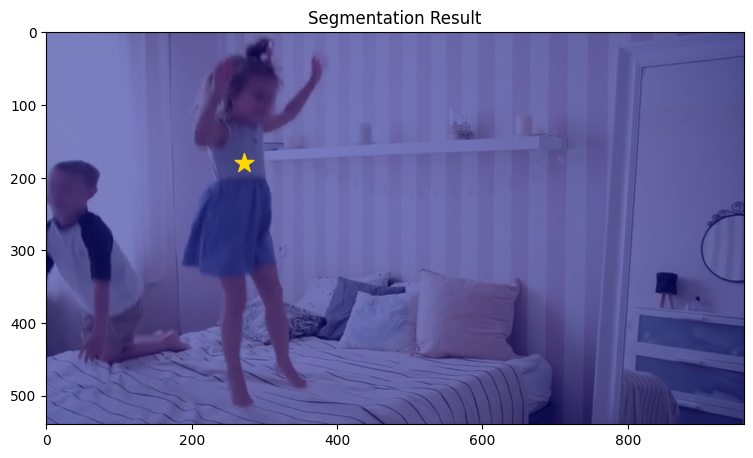

In [66]:
import tkinter as tk
from PIL import Image, ImageTk
import os
import numpy as np
import matplotlib.pyplot as plt

# Initialize the global coordinates variable
coordinates = []
original_size = None  # To store the original size of the image

# Function to access the first jpg frame of the video folder
def access_first_frame(video_dir):
    files = [f for f in os.listdir(video_dir) if f.endswith('.jpg')]
    if not files:
        print("No JPG files found in the directory.")
        return None
    first_frame_path = os.path.join(video_dir, files[0])
    return first_frame_path

# Function to handle single clicks (adding or removing a coordinate)
def on_single_click(event, canvas):
    global coordinates, original_size  # Declare that we are using the global coordinates list
    x, y = event.x, event.y

    # Adjust coordinates based on the scale of the image
    scale_x = original_size[0] / canvas.winfo_width()
    scale_y = original_size[1] / canvas.winfo_height()

    # Transform the click coordinates to match the original image size
    transformed_x = x * scale_x
    transformed_y = y * scale_y
    clicked_coord = (transformed_x, transformed_y)

    # Check if the click is near an existing coordinate to remove it
    for coord in coordinates:
        if abs(coord[0] - transformed_x) <= 5 * scale_x and abs(coord[1] - transformed_y) <= 5 * scale_y:
            coordinates.remove(coord)
            print(f"Removed coordinates: {coord}")
            display_image(canvas.video_dir, canvas)
            update_segmentation(canvas)  # Update the segmentation after removing a point
            return
    
    # If the click is not on an existing dot, add the coordinate
    coordinates.append(clicked_coord)
    print(f"Clicked coordinates: {coordinates}")
    # Mark the coordinate on the canvas
    canvas.create_oval(x-5, y-5, x+5, y+5, outline="red", width=2)
    update_segmentation(canvas)  # Update the segmentation after adding a point

# Function to display the first frame on the canvas
def display_image(video_dir, canvas):
    global original_size
    first_frame_path = access_first_frame(video_dir)
    if not first_frame_path:
        return

    img = Image.open(first_frame_path)
    original_size = img.size  # Store the original image size before resizing
    img.thumbnail((800, 600))  # Adjust thumbnail size as needed
    img_tk = ImageTk.PhotoImage(img)

    canvas.delete("all")
    canvas.image = img_tk  # Keep a reference to avoid garbage collection
    canvas.create_image(0, 0, anchor=tk.NW, image=img_tk)

    # Redraw existing coordinates on the image
    for coord in coordinates:
        # Reverse scaling to map the coordinates to the canvas size
        scaled_x = coord[0] / original_size[0] * canvas.winfo_width()
        scaled_y = coord[1] / original_size[1] * canvas.winfo_height()
        canvas.create_oval(scaled_x-5, scaled_y-5, scaled_x+5, scaled_y+5, outline="red", width=2)

# Function to update segmentation based on the clicked points
def update_segmentation(canvas):
    # Convert the coordinates to numpy array for the model
    points = np.array([[coord[0], coord[1]] for coord in coordinates], dtype=np.float32)
    
    # Create labels array: 1 for positive click
    labels = np.ones(len(coordinates), dtype=np.int32)
    
    # Get the frame path (already in JPG format) from the canvas object
    frame_path = access_first_frame(canvas.video_dir)

    # Get the segmentation mask using the frame path
    mask, frame_path = segment_object(frame_path, points, labels)

    # Ensure the mask is 2D by squeezing any extra dimensions
    mask = np.squeeze(mask)  # This removes any dimensions of size 1, e.g., from (1, 540, 960) to (540, 960)

    # Display the mask on top of the image using matplotlib
    plt.figure(figsize=(9, 6))
    plt.imshow(Image.open(frame_path))  # Load and display the frame
    plt.imshow(mask, alpha=0.5, cmap='jet')  # Overlay the mask with some transparency
    plt.scatter(points[:, 0], points[:, 1], color='gold', marker='*', s=200)  # Display the points as stars
    plt.title("Segmentation Result")
    plt.show()

def segment_object(frame_path, points, labels, obj_id=None):
    """
    Uses the segmentation model to generate a mask for the object based on the clicked points.
    
    :param frame_path: str, path to the frame in JPG format.
    :param points: np.ndarray, array of points where the user clicked.
    :param labels: np.ndarray, array of labels corresponding to the points.
    :param obj_id: int, optional, unique ID for the object you are interacting with.
    :return: np.ndarray, a binary mask of the segmented object.
    """
    
    ann_frame_idx = extract_frame_index(frame_path)  # Custom function to extract frame index from frame path
    
    ann_obj_id = obj_id if obj_id is not None else generate_unique_obj_id(points)  # Custom function to generate unique obj_id

    # Load the frame from the path
    frame_image = Image.open(frame_path)
    frame_np = np.array(frame_image)  # Convert the PIL image to a numpy array

    # Ensure points are in the correct format (e.g., [[x1, y1], [x2, y2], ...])
    if isinstance(points, list):
        points = np.array(points)

    # Ensure labels are correctly formatted (e.g., [1, 1, ...] or other appropriate labels)
    labels = np.array(labels)

    # Call the model's function to generate the mask
    _, out_obj_ids, out_mask_logits = predictor.add_new_points_or_box(
        inference_state=inference_state,
        frame_idx=ann_frame_idx,
        obj_id=ann_obj_id,
        points=points,
        labels=labels,
    )

    # Ensure the output logits are processed correctly into a mask
    mask = (out_mask_logits[0] > 0.0).cpu().numpy()

    # Verify that the mask correctly covers the object
    if not np.any(mask):
        print("Warning: No mask generated. Check if points and labels are correctly set.")
    
    # Return the mask and the frame path for visualization
    return mask, frame_path


def extract_frame_index(frame_path):
    # Assuming the frame index is the last part of the path before the file extension
    # For example, if frame_path is 'folder/bedroom/00132.jpg'
    
    # Extract the base name (e.g., '00132.jpg')
    base_name = os.path.basename(frame_path)
    
    # Remove the file extension and convert to an integer (e.g., '00132' -> 132)
    frame_index = int(os.path.splitext(base_name)[0])
    
    return frame_index


def generate_unique_obj_id(points):
    # Generate a unique obj_id based on the points clicked within this frame
    # This is a placeholder and should be replaced with actual logic
    return hash(tuple(points.flatten()))  # Example logic using the hash of the points


# Main function to set up the GUI
def main():
    root = tk.Tk()
    root.title("Image Clicker")

    # Use the pre-defined directory containing JPG files
    video_dir = selected_directory
    if not video_dir:
        print("No directory selected.")
        return

    canvas = tk.Canvas(root, width=800, height=600)
    canvas.pack()

    # Store the directory path in the canvas object
    canvas.video_dir = video_dir

    # Bind single-click (Button-1) to add or remove a coordinate
    canvas.bind("<Button-1>", lambda event: on_single_click(event, canvas))

    display_image(video_dir, canvas)

    root.mainloop()

# Run the main function
main()


Selected Points: [[242.97766  49.0099 ]
 [363.27542  40.9901 ]]


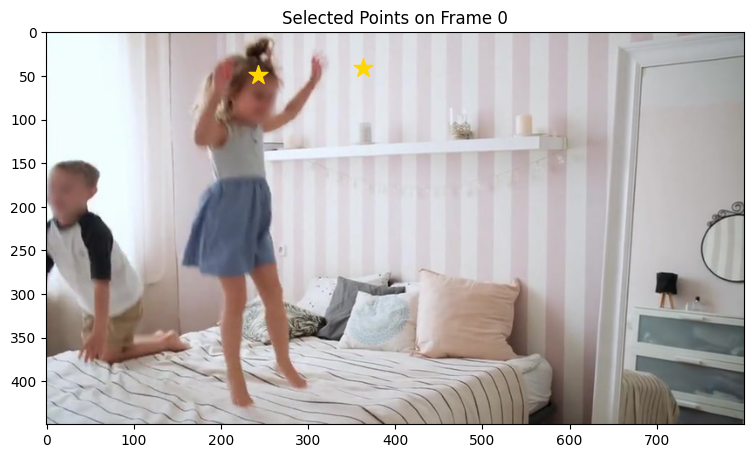

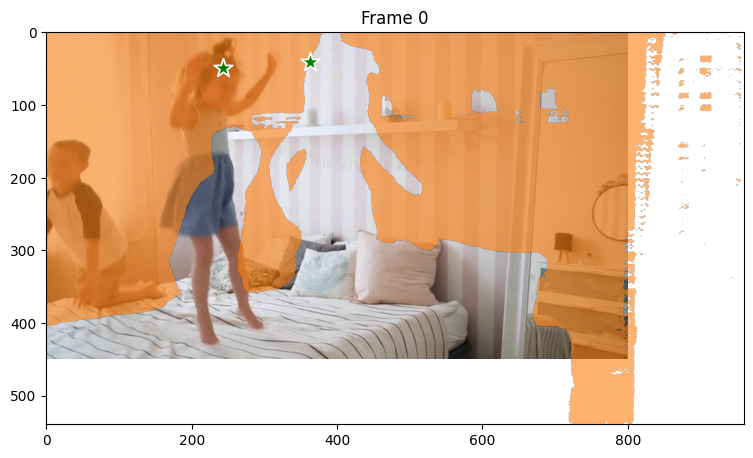

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Assuming `coordinates` is a global variable containing user input for the correct frame
# Extract the first two specific clicks (assuming you want the first two clicks)

# If you want to use specific clicks, ensure that you have the correct two points
# For this example, I'm taking the first two clicks, adjust the index as necessary
selected_points = coordinates[:2]  # Only take the first two clicks

# Convert selected points into numpy array
points = np.array([[coord[0], coord[1]] for coord in selected_points], dtype=np.float32)

# Debugging: Print the selected points to ensure they are correct
print(f"Selected Points: {points}")

# Create labels array: 1 for positive click
labels = np.ones(len(points), dtype=np.int32)

# Ensure `video_dir` and `frame_names` are properly set up and accessible
# `video_dir` should point to the directory with the frames
# `frame_names` should be a list of the frame filenames in the correct order
frame_path = os.path.join(video_dir, frame_names[ann_frame_idx])  # Ensure the correct frame is loaded

# Load the selected frame
frame_image = Image.open(frame_path)

# Resize the image to fit within 800x600 while maintaining aspect ratio
frame_image.thumbnail((800, 600), Image.Resampling.LANCZOS)

# Visualize the selected points as stars on the frame before processing
plt.figure(figsize=(9, 6))
plt.imshow(frame_image)
plt.scatter(points[:, 0], points[:, 1], color='gold', marker='*', s=200)  # Use stars for the selected points
plt.title(f"Selected Points on Frame {ann_frame_idx}")
plt.show()

# Send the selected points and labels to `add_new_points_or_box`
_, out_obj_ids, out_mask_logits = predictor.add_new_points_or_box(
    inference_state=inference_state,
    frame_idx=ann_frame_idx,
    obj_id=ann_obj_id,
    points=points,
    labels=labels,
)

# Show the results on the selected frame
plt.figure(figsize=(9, 6))
plt.title(f"Frame {ann_frame_idx}")
plt.imshow(frame_image)
show_points(points, labels, plt.gca())
show_mask((out_mask_logits[0] > 0.0).cpu().numpy(), plt.gca(), obj_id=out_obj_ids[0])
plt.show()
